# Exploratory Data Analysis 


In [92]:
#standard libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import rcParams
%matplotlib inline

In [17]:
#import nhanes data 
df = pd.read_csv('nhanes_extracted.csv')

In [18]:
df.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)

In [19]:
df.head()

,SEQN,Gender,Age,Ethnicity,FHx,Fasting Glucose (mmol/L),Two Hour Glucose(OGTT) (mmol/L),How long ago saw a diabetes specialist,Retinopathy,Last time had pupils dilated for exam,...,metformin,other_agents,ace_arbs,eGFR,HbA1c_correct,known_diabetes,hba1c_result,MAP,ogtt_result,diagnostic_t2dm
0,83732,1.0,62.0,3.0,1.0,NaN,NaN,4.0,2.0,2.0,...,1,1,1,90.878589,52.995190,1.0,1.0,83.60,0,1
1,83733,1.0,53.0,3.0,1.0,5.59,NaN,NaN,NaN,NaN,...,0,0,0,78.529438,36.598164,2.0,0.0,102.96,0,0
2,83734,1.0,78.0,3.0,2.0,4.66,8.66,3.0,2.0,2.0,...,0,0,1,67.393831,NaN,1.0,NaN,74.58,0,0
3,83735,2.0,56.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,63.898943,37.691299,2.0,0.0,90.42,0,0
4,83737,2.0,72.0,1.0,1.0,5.93,5.50,NaN,NaN,NaN,...,0,0,0,49.298425,40.970704,2.0,0.0,78.10,0,0


In [20]:
df.shape

(28273, 42)

In [21]:
df.columns

Index(['SEQN', 'Gender', 'Age', 'Ethnicity', 'FHx', 'Fasting Glucose (mmol/L)',
       'Two Hour Glucose(OGTT) (mmol/L)',
       'How long ago saw a diabetes specialist', 'Retinopathy',
       'Last time had pupils dilated for exam', 'bmi',
       'Alanine Aminotransferase (ALT) (U/L)',
       'Albumin, refrigerated serum (g/dL)',
       'Alkaline Phosphatase (ALP) (U/L)',
       'Aspartate Aminotransferase (AST) (U/L)', 'Bicarbonate (mmol/L)',
       'Blood Urea Nitrogen (g/dL)', 'Chloride (mmol/L)',
       'Cholesterol, refrigerated serum (mg/dL)',
       'Creatinine, refrigerated serum (umol/L)',
       'Gamma Glutamyl Transferase (GGT) (U/L)',
       'Glucose, refrigerated serum (mmol/L)', 'Potassium (mmol/L)',
       'Sodium (mmol/L)', 'Total Bilirubin (umol/L)', 'Total Calcium (mmol/L)',
       'Triglycerides, refrig serum (mg/dL)', 'LDL cholesterol (mmol/L)',
       'HDL cholesterol (mmol/L)', 'Prescriptions', 'insulin', 'statin',
       'metformin', 'other_agents', 'ace_arbs', 

In [22]:
#remove participants with no laboratory values 
labs = ['Alanine Aminotransferase (ALT) (U/L)',
       'Albumin, refrigerated serum (g/dL)',
       'Alkaline Phosphatase (ALP) (U/L)',
       'Aspartate Aminotransferase (AST) (U/L)', 'Bicarbonate (mmol/L)',
       'Blood Urea Nitrogen (g/dL)', 'Chloride (mmol/L)',
       'Cholesterol, refrigerated serum (mg/dL)',
       'Creatinine, refrigerated serum (umol/L)',
       'Gamma Glutamyl Transferase (GGT) (U/L)',
       'Glucose, refrigerated serum (mmol/L)', 'Potassium (mmol/L)',
       'Sodium (mmol/L)', 'Total Bilirubin (umol/L)', 'Total Calcium (mmol/L)',
       'Triglycerides, refrig serum (mg/dL)', 'LDL cholesterol (mmol/L)',
       'HDL cholesterol (mmol/L)', 'eGFR', 'Fasting Glucose (mmol/L)',
       'Two Hour Glucose(OGTT) (mmol/L)']

In [23]:
df.dropna(how='all', subset=labs, inplace=True)

In [24]:
df.shape

(25726, 42)

In [25]:
#2547 participants removed because they had no laboratory value recorded 
28273 - 25726

2547

In [28]:
#remove participants with no HbA1c (target variable)

In [27]:
df.dropna(subset=['hba1c_result'], inplace=True)

In [29]:
df.shape

(21361, 42)

In [30]:
#4365 participants removed because they had no HbA1c value recorded 
25726 - 21361

4365

In [31]:
#final study population 
df.shape

(21361, 42)

# Demographics 

In [42]:
df.groupby('known_diabetes')['Gender'].value_counts(dropna=False)

known_diabetes  Gender
1.0             2.0       1271
                1.0       1019
2.0             2.0       9905
                1.0       8706
3.0             2.0        250
                1.0        210
Name: Gender, dtype: int64

In [43]:
df.groupby('known_diabetes')['Ethnicity'].value_counts(dropna=False)

known_diabetes  Ethnicity
1.0             3.0           824
                4.0           497
                1.0           458
                2.0           288
                5.0           223
2.0             3.0          8603
                4.0          2937
                1.0          2921
                5.0          2112
                2.0          2038
3.0             3.0           206
                4.0            87
                1.0            76
                5.0            48
                2.0            43
Name: Ethnicity, dtype: int64

In [39]:
df.groupby('known_diabetes')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
known_diabetes,,,,,,,,
1.0,2290.0,60.522707,12.408817,21.0,52.0,62.0,70.0,80.0
2.0,18611.0,47.330987,16.924806,21.0,33.0,46.0,61.0,80.0
3.0,460.0,57.993478,13.845788,21.0,49.0,59.0,67.0,80.0


In [44]:
df.groupby('known_diabetes')['FHx'].value_counts(dropna=False)

known_diabetes  FHx
1.0             1.0     1534
                2.0      698
                NaN       58
2.0             2.0    11590
                1.0     6673
                NaN      348
3.0             1.0      274
                2.0      177
                NaN        9
Name: FHx, dtype: int64

# Current Diabetic Status 


In [46]:
df['known_diabetes'].value_counts(dropna=False)

2.0    18611
1.0     2290
3.0      460
Name: known_diabetes, dtype: int64

In [47]:
df['hba1c_result'].value_counts(dropna=False)

0.0    19328
1.0     2033
Name: hba1c_result, dtype: int64

In [48]:
df['ogtt_result'].value_counts(dropna=False)

0    19758
1     1603
Name: ogtt_result, dtype: int64

In [50]:
df['Glucose, refrigerated serum (mmol/L)'].describe()

count    21209.000000
mean         5.698079
std          2.160577
min          1.830000
25%          4.770000
50%          5.160000
75%          5.770000
max         33.860000
Name: Glucose, refrigerated serum (mmol/L), dtype: float64

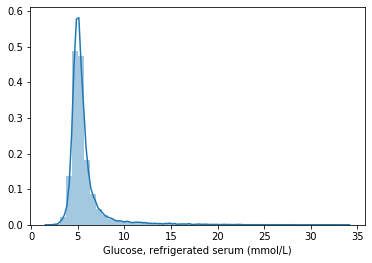

In [52]:
sns.distplot(df['Glucose, refrigerated serum (mmol/L)'])

In [53]:
df['diagnostic_t2dm'].value_counts(dropna=False)

0    18583
1     2778
Name: diagnostic_t2dm, dtype: int64

# Unrecognised T2DM 

In [70]:
def unrecognised_t2dm(row): 
    
    if (row['hba1c_result'] ==1): 
        if row['known_diabetes']==1: 
            return('Recognised T2DM')
        else: 
            return('Unrecognised T2DM')
        
    elif row['ogtt_result'] == 1: 
        if row['known_diabetes']==1: 
            return('Recognised T2DM')
        else: 
            return('Unrecognised T2DM')
        
    else: 
        return('Not T2DM')

In [71]:
df['unrecognised_t2dm'] = df.apply(unrecognised_t2dm, axis=1)

In [72]:
df['unrecognised_t2dm'].value_counts(dropna=False)

Not T2DM             18583
Recognised T2DM       1620
Unrecognised T2DM     1158
Name: unrecognised_t2dm, dtype: int64

In [73]:
#41.6% of all participants with biochemical evidence of T2DM were not aware of their diabetic status 
1158/(1158+1620)

0.4168466522678186

In [79]:
#31.1% of all participants who should have a diagnosis of T2DM were not aware of their status 
1033/(1033+2290)

0.3108636773999398

In [74]:
df['known_diabetes'].value_counts(dropna=False)

2.0    18611
1.0     2290
3.0      460
Name: known_diabetes, dtype: int64

In [78]:
df.groupby('known_diabetes')['unrecognised_t2dm'].value_counts(dropna=False)

known_diabetes  unrecognised_t2dm
1.0             Recognised T2DM       1620
                Not T2DM               670
2.0             Not T2DM             17578
                Unrecognised T2DM     1033
3.0             Not T2DM               335
                Unrecognised T2DM      125
Name: unrecognised_t2dm, dtype: int64

# Treatment 

In [90]:
df[['metformin', 'other_agents', 'insulin', 'ace_arbs', 'statin']].sum()

metformin       1506
other_agents     535
insulin          577
ace_arbs        3640
statin          3732
dtype: int64

In [91]:
df.groupby('known_diabetes')[['metformin', 'insulin']].sum()

,metformin,insulin
known_diabetes,,
1.0,1328,570
2.0,112,7
3.0,66,0
